
## Marketing Analytics  

* What drives ad performance?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import xgboost
import graphviz
from sklearn import tree
from sklearn.svm import SVC
from sklearn.base import clone 
from sklearn.metrics import accuracy_score
from IPython.core.display import display, HTML
from sklearn.ensemble import RandomForestClassifier

In [3]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/bank-full.csv"
bank = pd.read_csv(file_name, sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
bank.shape

(45211, 17)

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
bank.describe(include = [np.object, pd.Categorical]).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


### No missing values

In [9]:
bank.isnull().sum().sort_values(ascending=False)

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [10]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Analyzing jobs

* Pie chart with percentages of each job

In [13]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

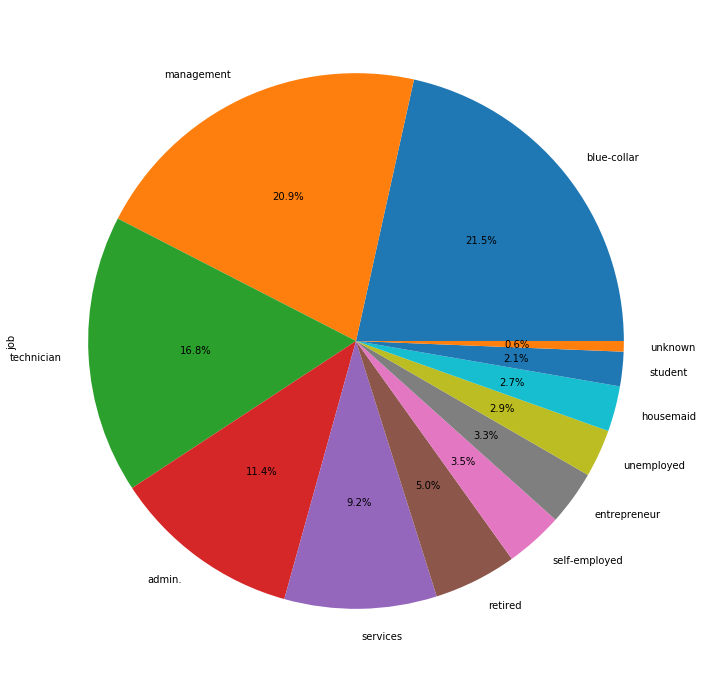

In [14]:
fig = plt.figure(figsize = (12, 14))
bank['job'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

### Converting target variable 

* Using apply function to transform target variable 'y' from yes/no into 0s/1s

In [15]:
bank['converted'] = bank['y'].apply(lambda x: 0 if x == 'no' else 1)
del bank['y']

In [16]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0


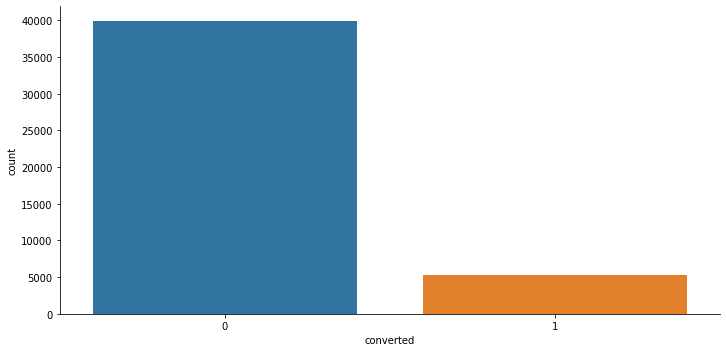

In [17]:
sns.factorplot('converted', data = bank, kind = 'count', aspect = 2.0)

In [18]:
bank.groupby('converted').size()

converted
0    39922
1     5289
dtype: int64

In [19]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0


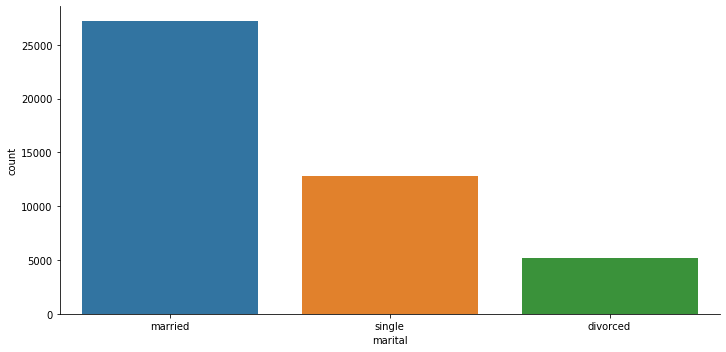

In [20]:
sns.factorplot('marital', data = bank, kind = 'count', aspect = 2.0)

In [21]:
bank.groupby('marital').size()

marital
divorced     5207
married     27214
single      12790
dtype: int64

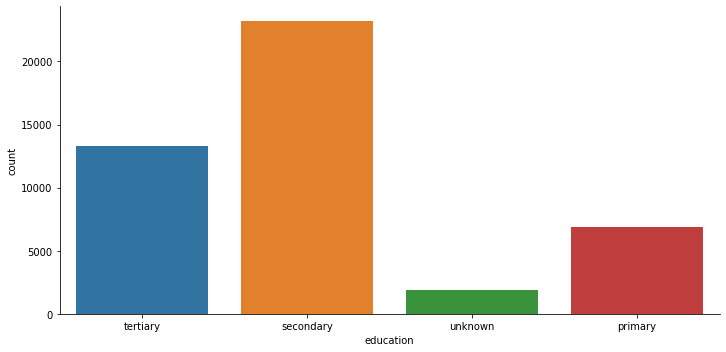

In [22]:
sns.factorplot('education', data = bank, kind = 'count', aspect = 2.0)

In [23]:
bank.groupby('education').size()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

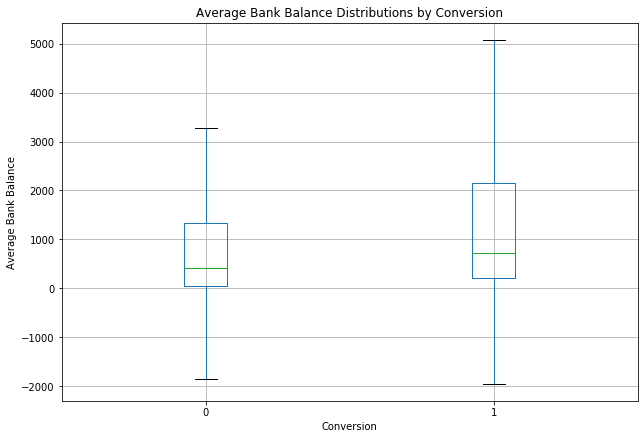

In [24]:
ax = bank[['converted', 'balance']].boxplot(by='converted', showfliers=False, figsize=(10, 7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.suptitle("")
plt.show()


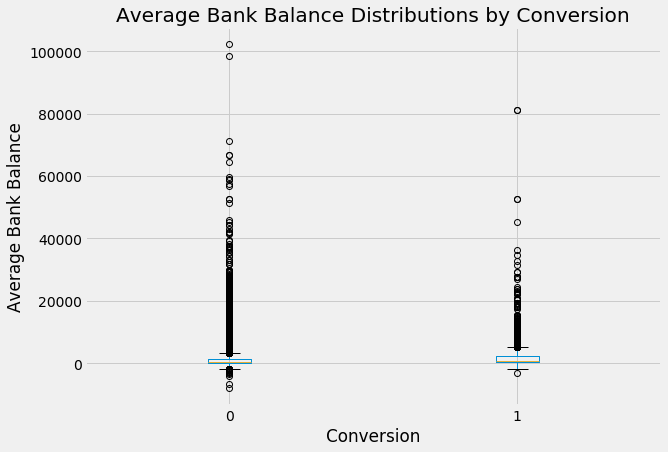

In [25]:
ax = bank[['converted', 'balance']].boxplot(by='converted', showfliers=True, figsize=(10, 7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')


plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.suptitle("")
plt.show()


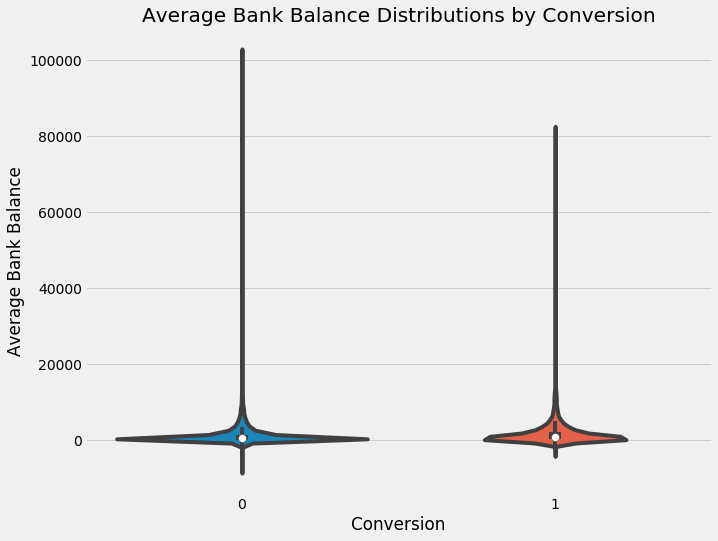

In [26]:
# Let's do the same withing using Violin plots

fontsize = 10

fig, axes = plt.subplots()
fig.set_size_inches(10, 8)

sns.violinplot('converted','balance', data=bank, ax = axes)
axes.set_title('Average Bank Balance Distributions by Conversion')

axes.yaxis.grid(True)
axes.set_xlabel('Conversion')
axes.set_ylabel('Average Bank Balance')

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')
plt.show()

In [27]:
bank['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

* Conversion rate by campaign


* Top ten campaigns in terms of % converted

In [28]:
conversions_by_contacts = bank.groupby('campaign')['converted'].sum() / bank.groupby('campaign')['converted'].count() * 100.0

conversions_by_contacts.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: converted, dtype: float64

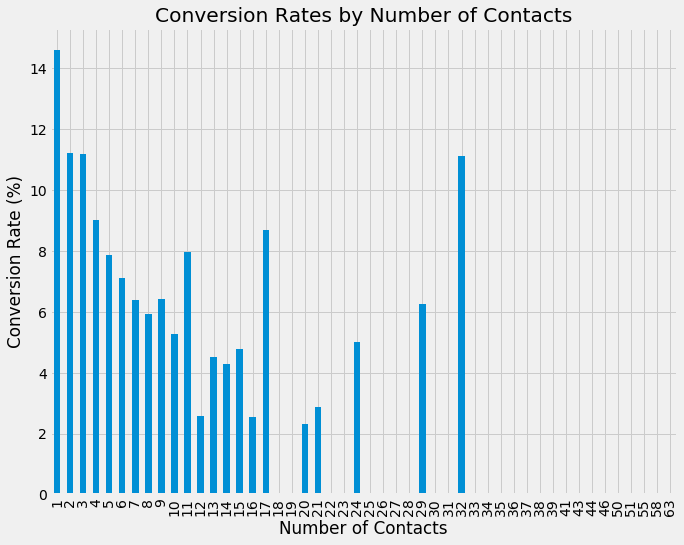

In [29]:
ax = conversions_by_contacts.plot(
    kind='bar',
    figsize=(10, 8),
    title='Conversion Rates by Number of Contacts',
    grid=True)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')

plt.show()

##### Conversion rate by job

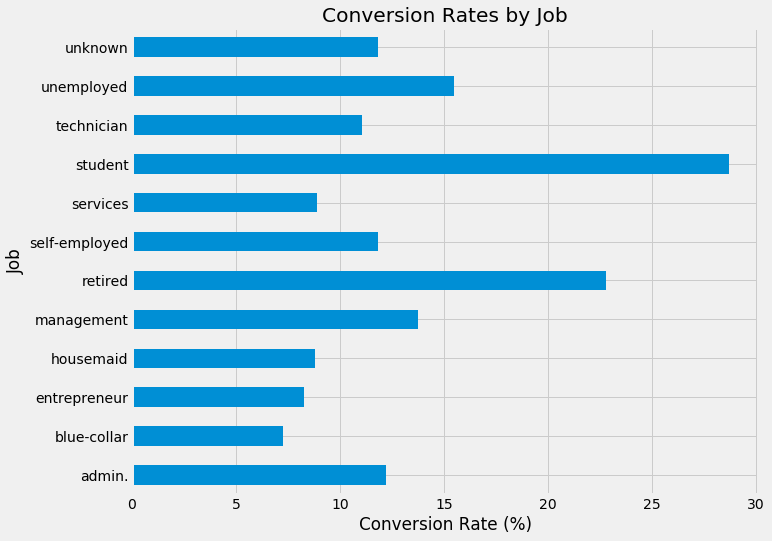

In [30]:

conversion_rate_by_job = bank.groupby(by='job')['converted'].sum() / bank.groupby(by='job')['converted'].count() * 100.0
ax = conversion_rate_by_job.plot(kind='barh', grid=True, title='Conversion Rates by Job')

ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')

plt.show()

In [31]:
# Get our category type columns
cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['default',
 'education',
 'loan',
 'housing',
 'contact',
 'marital',
 'month',
 'job',
 'poutcome']

# We need to encode our cateogorical varaibles 
marital',
 'loan',
 'month',
 'contact',
 'housing',
 'education',
 'poutcome',
 'default',
 'job'

In [32]:
# Starting with month first
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

### Conversion rate by month

In [33]:
bank.groupby('month').count()['converted']

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [34]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

bank['month'] = bank['month'].apply(lambda x: months.index(x)+1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


### Let's encode jobs & marital

In [35]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [36]:
bank = pd.get_dummies(data=bank, columns=['job'])
bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,1


In [37]:
bank = pd.get_dummies(data=bank, columns=['marital'])
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,yes,no,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,no,no,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


### Encoding Housing 

In [38]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
bank['housing'] = bank['housing'].map(lambda s :1  if s == 'yes' else 0)
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,no,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,no,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,yes,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,no,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,no,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


### Encoding loans 

In [40]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [41]:
bank['loan'] = bank['loan'].map(lambda s :1  if s == 'yes' else 0)
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,0,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,0,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,1,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,0,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,0,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


In [42]:
bank.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'converted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [43]:
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,0,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,0,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,1,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,0,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,0,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


In [44]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [45]:
bank = pd.get_dummies(data=bank, columns=['education'])
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,no,2143,1,0,unknown,5,5,261,1,...,0,0,0,0,1,0,0,0,1,0
1,44,no,29,1,0,unknown,5,5,151,1,...,1,0,0,0,0,1,0,1,0,0
2,33,no,2,1,1,unknown,5,5,76,1,...,0,0,0,0,1,0,0,1,0,0
3,47,no,1506,1,0,unknown,5,5,92,1,...,0,0,0,0,1,0,0,0,0,1
4,33,no,1,0,0,unknown,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


In [46]:
#default, , contact
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [47]:
bank = pd.get_dummies(data=bank, columns=['contact'])

In [48]:
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,no,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,1,0,5,5,151,1,-1,...,0,0,1,0,1,0,0,0,0,1
2,33,no,2,1,1,5,5,76,1,-1,...,0,1,0,0,1,0,0,0,0,1
3,47,no,1506,1,0,5,5,92,1,-1,...,0,1,0,0,0,0,1,0,0,1
4,33,no,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


In [49]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [50]:
bank = pd.get_dummies(data=bank, columns=['default'])

In [51]:
bank.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,1,0,0,0,1,1,0
1,44,29,1,0,5,5,151,1,-1,0,...,1,0,1,0,0,0,0,1,1,0
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,1,0,0,0,0,1,1,0
3,47,1506,1,0,5,5,92,1,-1,0,...,0,0,0,0,1,0,0,1,1,0
4,33,1,0,0,5,5,198,1,-1,0,...,1,0,0,0,1,0,0,1,1,0


* Previous outcome

In [52]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [53]:
bank = pd.get_dummies(data=bank, columns=['poutcome'])

In [54]:
bank.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
1,44,29,1,0,5,5,151,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
3,47,1506,1,0,5,5,92,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,...,1,0,0,1,1,0,0,0,0,1


In [55]:
cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [56]:
Y_train = bank['converted']
X_train = bank.drop(labels = ["converted"], axis = 1)

In [57]:
X_train.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
1,44,29,1,0,5,5,151,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
3,47,1506,1,0,5,5,92,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,...,1,0,0,1,1,0,0,0,0,1


In [58]:
X_train.tail()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
45206,51,825,0,0,17,11,977,3,-1,0,...,0,1,0,0,1,0,0,0,0,1
45207,71,1729,0,0,17,11,456,2,-1,0,...,0,1,0,0,1,0,0,0,0,1
45208,72,5715,0,0,17,11,1127,5,184,3,...,0,1,0,0,1,0,0,0,1,0
45209,57,668,0,0,17,11,508,4,-1,0,...,0,0,1,0,1,0,0,0,0,1
45210,37,2971,0,0,17,11,361,2,188,11,...,0,1,0,0,1,0,0,1,0,0


## Model Implementation

In [59]:
decision_tree_model = tree.DecisionTreeClassifier(max_depth=5)

In [60]:
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
features = list(X_train.columns)
response_var = 'converted'

In [62]:
features

['age',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'default_no',
 'default_yes',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [63]:
dot_data = tree.export_graphviz(decision_tree_model, feature_names=features, class_names=['0', '1'],
                                filled=True, rounded=True, special_characters=True) 

* Creating a visualization graph of the tree

In [64]:
graph = graphviz.Source(dot_data)

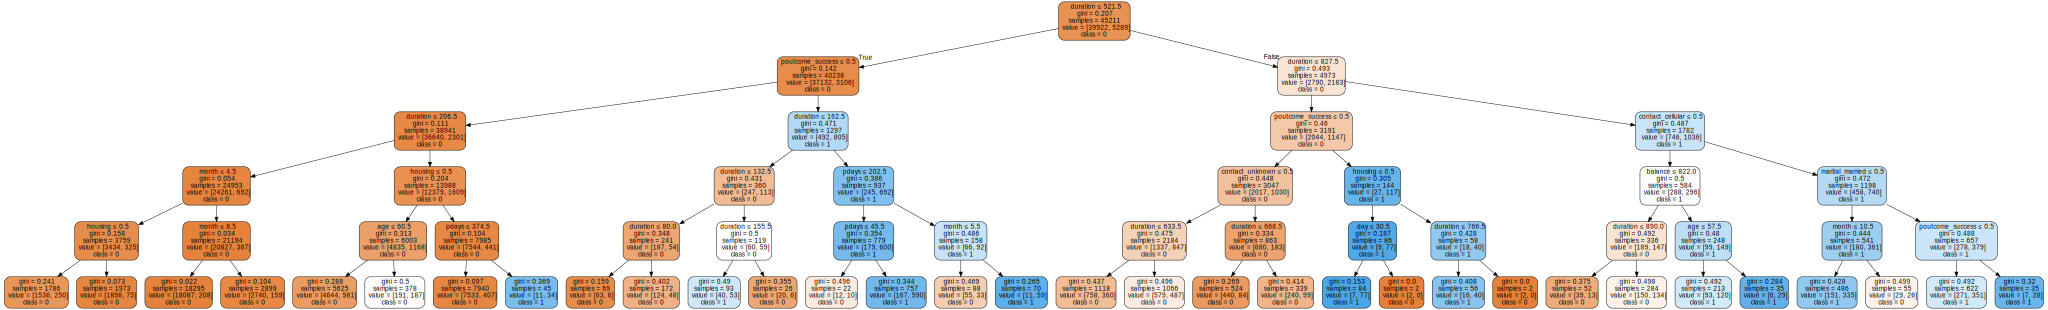

In [65]:
display(HTML("<style>text {font-size: 10px;}</style>"))

graph

* cloning the model to have the exact same specification as the one initially trained


* iterating over all columns and storing feature importance -  (difference between benchmark and new model)


In [66]:
def imp_df(column_names, importances):
  df = pd.DataFrame({'feature': column_names, 
                     'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
  return df

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [67]:
drop_col_feat_imp(decision_tree_model, X_train, Y_train)

,feature,feature_importance
0,duration,0.009002
1,poutcome_success,0.004711
2,pdays,0.000929
3,month,0.000177
4,marital_married,0.000066
5,day,0.000022
6,job_technician,0.000000
7,education_tertiary,0.000000
8,marital_divorced,0.000000
9,marital_single,0.000000
